<a href="https://colab.research.google.com/github/du6293/project/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(4)%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC%EB%9F%89_%ED%95%99%EC%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 먼저 필요한 라이브러리들을 import 하고 환경을 만듭니다

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 나눔바른고딕 폰트 설치 - [런타임 다시 시작]되면 폰트를 다시 설치해야 한글이 보입니다.
!apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
# 한글폰트 설치하기 위해 필요함
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')
# 마이너스(음수)부호 설정
plt.rc("axes", unicode_minus = False)

# [미니프로젝트 4] 자전거 대여량 데이터 전처리

## 1.데이터 가져오기

In [ ]:
# 모델 학습 파일
TRAIN_CSV = "train.csv"


In [ ]:
train_df = pd.read_csv(TRAIN_CSV)


## 2.탐색적 자료분석
## Exploratory Data Analysis (EDA)
https://dacon.io/competitions/official/235837/overview/description

### pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [ ]:
train_df.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


+ 날짜(date_time)
+ 풍향(wind_direction)
+ 하늘 상태(sky_condition)
+ 강수 형태(precipitation_form)
+ 풍속(wind_speed)
+ 습도(humidity)
+ 최저기온(low_temp)
+ 최고기온(high_tmep)
+ 강수확률(Precipitation_probability)

- 당일 자전거 대여량(number_of_rentals)
```
+ 날짜(date_time)
+ 풍향(wind_direction)
+ 하늘 상태(sky_condition) 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
+ 강수 형태(precipitation_form) 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
+ 풍속(wind_speed)
+ 습도(humidity)
+ 최저기온(low_temp)
+ 최고기온(high_tmep)
+ 강수확률(Precipitation_probability)
```

In [ ]:
train_df.dtypes

date_time                     object
wind_direction               float64
sky_condition                float64
precipitation_form           float64
wind_speed                   float64
humidity                     float64
low_temp                     float64
high_temp                    float64
Precipitation_Probability    float64
number_of_rentals              int64
dtype: object

### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [ ]:
train_df.tail()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053
272,2020-06-30,120.797,3.622,0.432,5.574,77.061,19.125,26.053,41.284,38086


### pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [ ]:
train_df.shape

(273, 10)

### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [ ]:
train_df.isna().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

### pd.DataFrame.describe()

이제 데이터의 통계치를 알아보겠습니다.

pandas의 DataFrame은 describe이라는 메소드를 갖고있는데요 이를 통해 각 컬럼의 평균값, 최대치, 최소치, 편차 등을 알 수 있습니다.


- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">

In [ ]:
# 기술통계값을 알아봅시다. 

data_description = train_df.describe()
data_description

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


### == 데이터 시각화 ==

먼저 그래프 그리는 방법을 살펴봅니다

### plt.plot()의 스타일

색깔

|문자열|약자|
|----|-----|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|

마커

|마커|의미|
|----|----|
|.|점|
|o|원|
|v|역삼각형|
|^|삼각형|
|s|사각형|
|*|별|
|x|엑스|
|d|다이아몬드|

선

|문자열|의미|
|-----|-----|
| - | 실선|
|-- | 끊어진 실선|
| -.| 점+실선|
|:|점선|

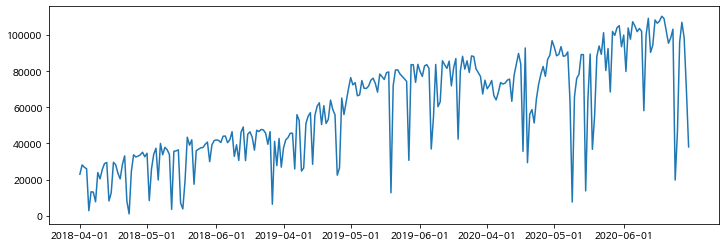

In [ ]:
# 자전거 대여량을 라인플롯으로 그리세요 plt.plot
plt.figure(figsize=(12,4))
plt.plot(train_df.date_time,train_df.number_of_rentals)
plt.xticks(ticks=[0,30,61,91,121,152,182,212,243])
plt.show()

<function matplotlib.pyplot.show>

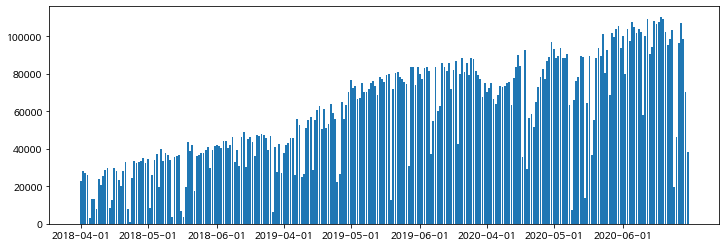

In [ ]:
# 자전거 대여량을 막대그래프로 으로 그리세요 plt.bar
plt.figure(figsize=(12,4))
plt.bar(train_df.date_time,train_df.number_of_rentals)
plt.xticks(ticks=[0,30,61,91,121,152,182,212,243])
plt.show

### plt.title(label, fontsize)
- 그래프 제목 생성

### plt.xlabel(label, fontsize)
- x축 이름 설정

### plt.ylabel(label, fontsize)
- y축 이름 설정

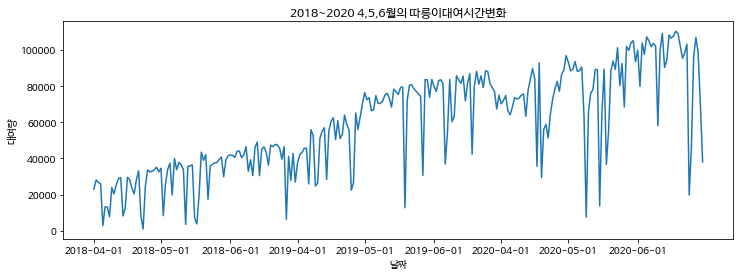

In [ ]:
plt.figure(figsize=(12,4))
plt.title("2018~2020 4,5,6월의 따릉이대여시간변화")
plt.xlabel("날짜")
plt.ylabel("대여량")
plt.plot(train_df.date_time,train_df.number_of_rentals)
plt.xticks(ticks=[0,30,61,91,121,152,182,212,243])
plt.show()

### plt.axvline(x, color)
- 축을 가로지르는 세로 선 생성

### plt.axhline(h, color)
- 축을 가로지르는 가로 선 생성

### plt.text(x, y, s, fontsize)
- 원하는 위치에 텍스트 생성

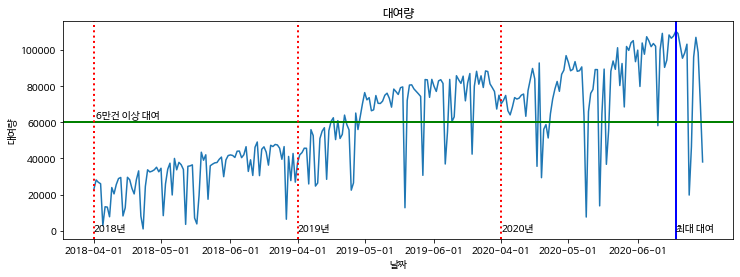

In [ ]:
plt.figure(figsize=(12,4))
plt.title("대여량")
plt.xlabel("날짜")
plt.ylabel("대여량")
plt.plot(train_df.date_time,train_df.number_of_rentals)
plt.xticks(ticks=[0,30,61,91,121,152,182,212,243])

plt.axvline(x=train_df.number_of_rentals.idxmax(), color='b', linewidth=2)
plt.text(train_df.number_of_rentals.idxmax(),10,"최대 대여")
plt.axhline(y=60000, color='g', linewidth=2)
plt.text(1,63000,"6만건 이상 대여")

# 년도별 가이드 선을 넣어보세요
plt.axvline(x=0, color='r',linestyle=':', linewidth=2)
plt.text(0,10,"2018년")
plt.axvline(x=91, color='r',linestyle=':', linewidth=2)
plt.text(91,10,"2019년")
plt.axvline(x=182, color='r',linestyle=':', linewidth=2)
plt.text(182,10,"2020년")
plt.show()

숫자로만 봐서는 분포를 가늠하기 힘듭니다

각각의 데이터 분포를 히스토그램으로 그려보겠습니다.

각 데이터의 히스토그램에 평균(빨강)과 중앙값(초록)을 선으로 표시하면 더 보기 편하겠죠?

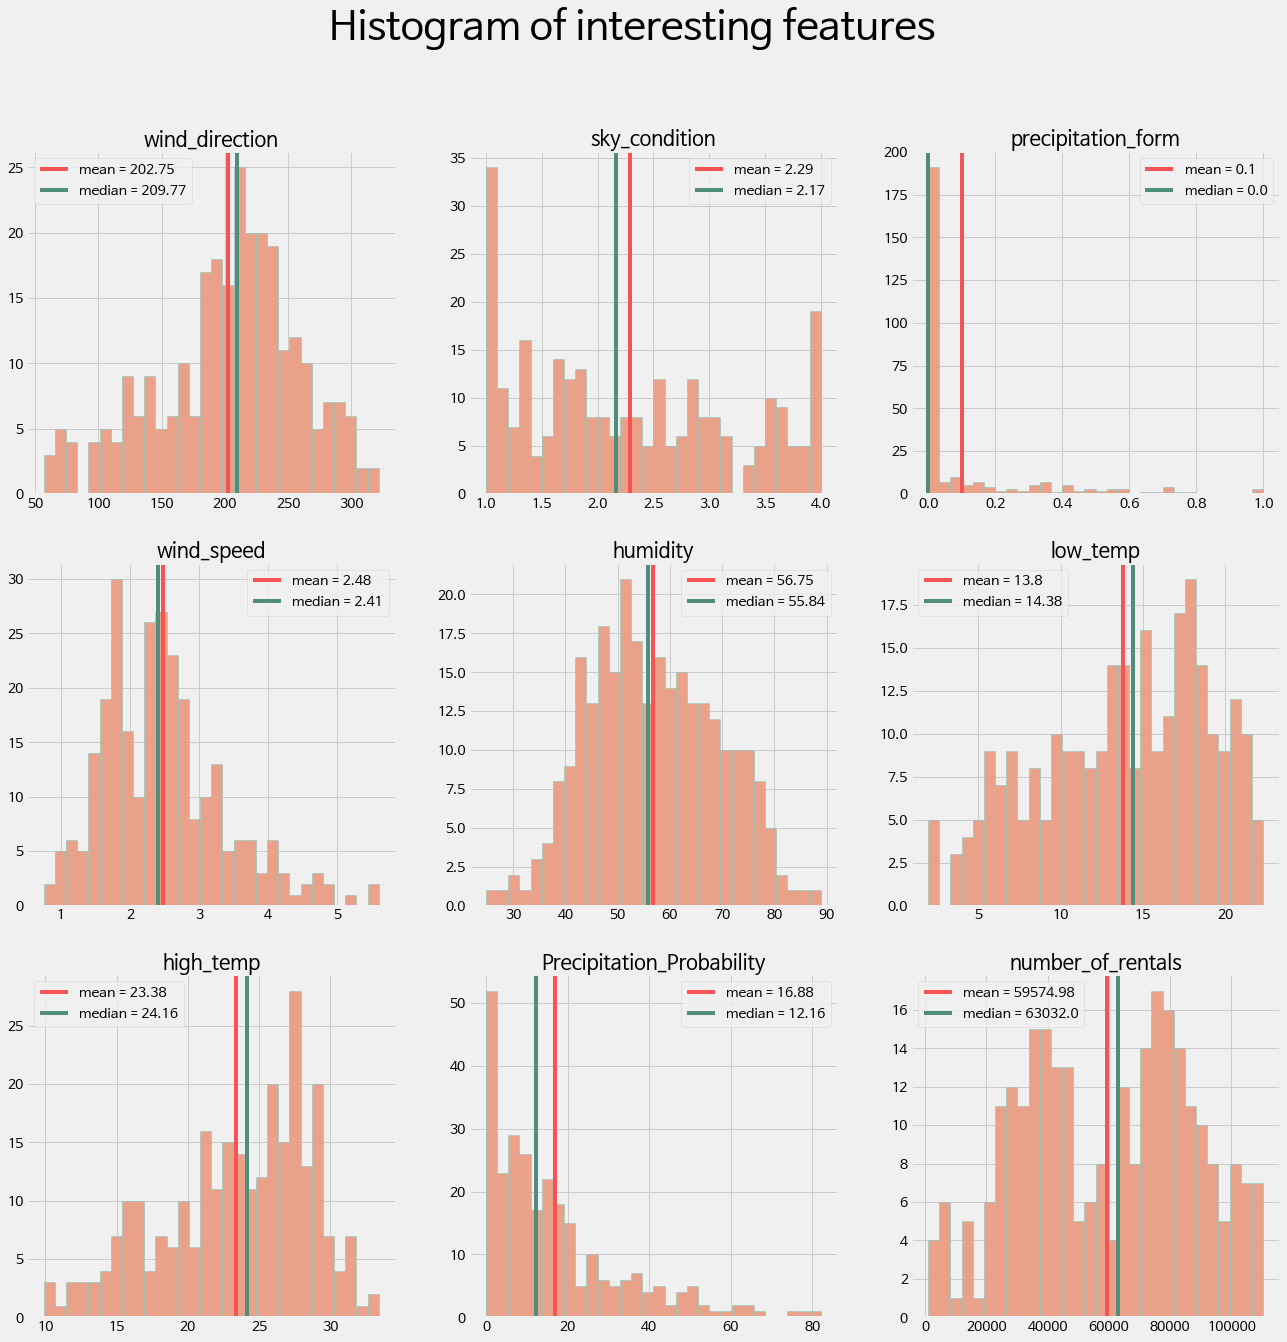

In [ ]:
# 기술통계 자료를 히스토그램을 살펴봅니다

interest_coloumns = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'number_of_rentals']

plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(3, 3, figsize = (20, 20))
fig.suptitle('Histogram of interesting features', fontsize=40)

#.hist(train_df[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
column_idx = 0
for i in range(3):
    for j in range(3):
        ax[i][j].hist(train_df[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1
        




여러분은 이 그래프들을 보면 어떤 아이디어가 떠오르나요?

하나 재밌는 지표를 발견할 수 있는데요 wind_direction을 살펴보면 평균 202, 가장 분포가 많이 되어있는 값이 200 - 250의 값입니다.

주어진 데이터가 4, 5, 6월의 데이터라는 사실을 떠올려보세요.

4, 5, 6월은 봄이 가고 여름이 오는 시기로 이때는 [양쯔강 기단에 의해 남서풍](http://edu.chosun.com/m/view.html?contid=2014121501005)이 많이 부는 시기입니다.

만약 날짜 데이터가 주어지지 않고 풍향, 습도 등 기상 데이터만 주어졌다면 여러분은 대략 4, 5, 6월의 데이터라고 유추할 수도 있었을 것입니다.

### [데이터 전처리] 일자 분리 + 요일 추가

모델에 수치를 넣고 학습시키기 위해선 글자나 문자를 숫자로 바꿔주는 작업이 필요합니다.

주어진 데이터를 살펴보면 date_time부분이 문자열(string)로 되어있는 것을 확인하실 수 있습니다.

이를 각각 년도, 월, 일로 나누어 숫자형으로 변환해 보겠습니다.

In [ ]:
train_df['year'] = pd.to_datetime(train_df['date_time']).dt.year
train_df['month'] = pd.to_datetime(train_df['date_time']).dt.month
train_df['day'] = pd.to_datetime(train_df['date_time']).dt.day

train_df


,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,2020,6,26
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,2020,6,27
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,2020,6,28
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,2020,6,29


**요일 표시해보기**

우리에게는 날짜 데이터가 주어졌습니다.

하지만 요일이 빠져있네요 날짜로부터 요일을 채워넣어 보겠습니다.

In [ ]:
week_day = pd.to_datetime(train_df['date_time']).dt.day_name()
train_df['week_day'] = week_day
train_df.head()
# 요일을 숫자로 나타내는 방법은 다음과 같습니다. 후에 학습을 할 때는 숫자데이터가 필요합니다
# train_df['weekday_number'] = pd.to_datetime(train_df['date_time']).dt.dayofweek 
# 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


### 상관 관계 확인하기


정형 데이터 분석에서 중요한 부분은 각 컬럼(feature)간의 상관관계를 알아보는 것입니다.

상관분석을 통해 어떤 컬럼들이 높은 상관관계를 갖는지 알아보겠습니다.

- 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치 
- -1에서 1사이의 값을 지닙니다. 
- -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다. 
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다. 

![상관계수](https://t1.daumcdn.net/cfile/tistory/99DEE1425C6A9F2008)

- 상관관계는 인과관계와 다릅니다. 아래의 예시를 확인해 봅시다.

![상관성 예시](https://miro.medium.com/max/684/1*JLYI5eCVEN7ZUWXBIrrapw.png)

- 선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있습니다. 
- 하지만 선글라스 판매량이 증가했기 **때문에** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않습니다. 
- 선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것입니다. 

In [ ]:
#상관분석은 숫자로 계산할 수 있으므로 데이터에서 숫자로 이루어진 컬럼만을 뽑겠습니다 (date_time, week_day drop)
train_df_number = train_df.select_dtypes(np.number) 
train_df_number

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,2020,6,26
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,2020,6,27
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,2020,6,28
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,2020,6,29


### pd.DataFrame.corr()

- correlation coefficient 의 줄임말 입니다 

In [ ]:
import seaborn as sns

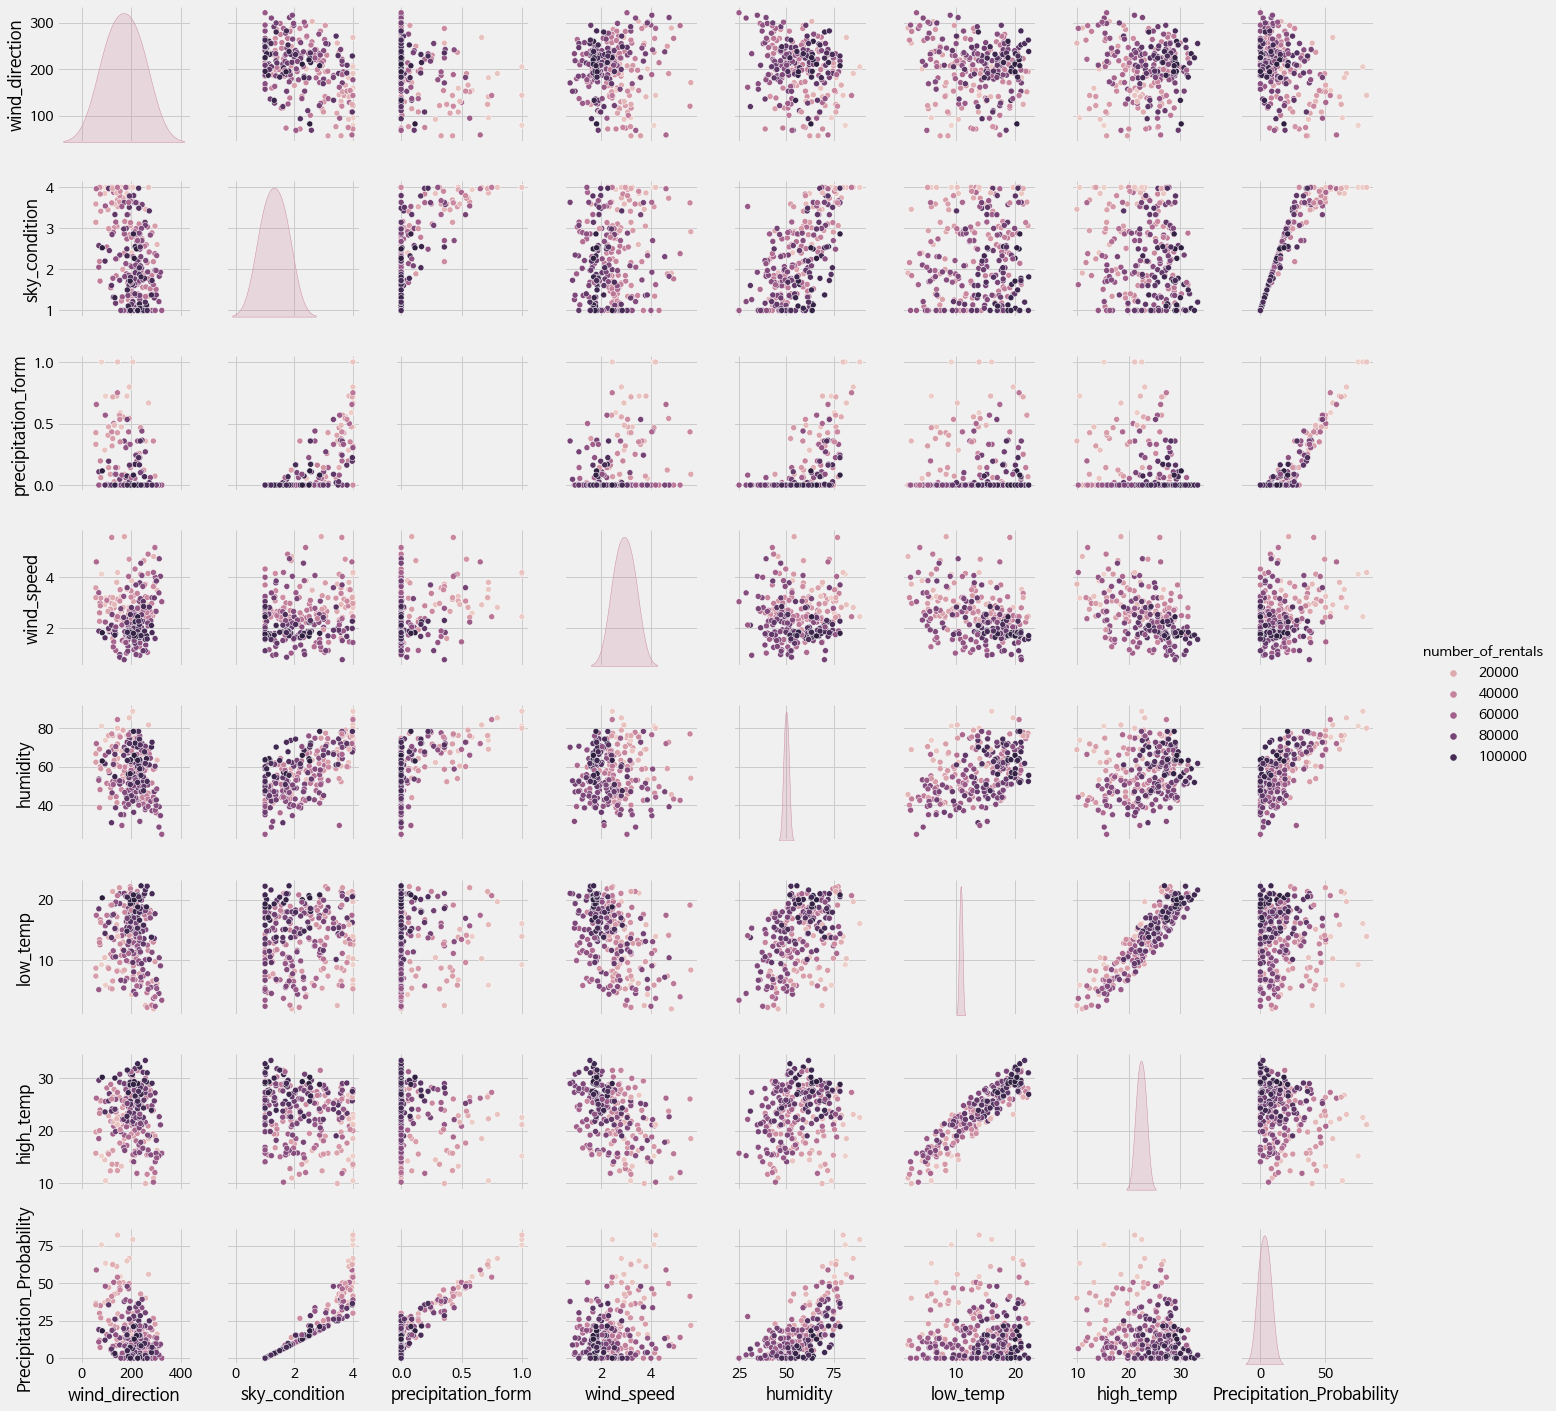

In [ ]:
interest_coloumns = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'number_of_rentals']
sns.pairplot(train_df[interest_coloumns], hue="number_of_rentals")

In [ ]:
# 상관관계    DataFrame.corr()
train_df.corr()['number_of_rentals']
train_df.corr()['number_of_rentals'].sort_values()


wind_speed                  -0.464761
Precipitation_Probability   -0.449225
precipitation_form          -0.420458
sky_condition               -0.384234
humidity                    -0.147824
day                          0.050760
wind_direction               0.209996
low_temp                     0.317741
month                        0.320019
high_temp                    0.423113
year                         0.739011
number_of_rentals            1.000000
Name: number_of_rentals, dtype: float64

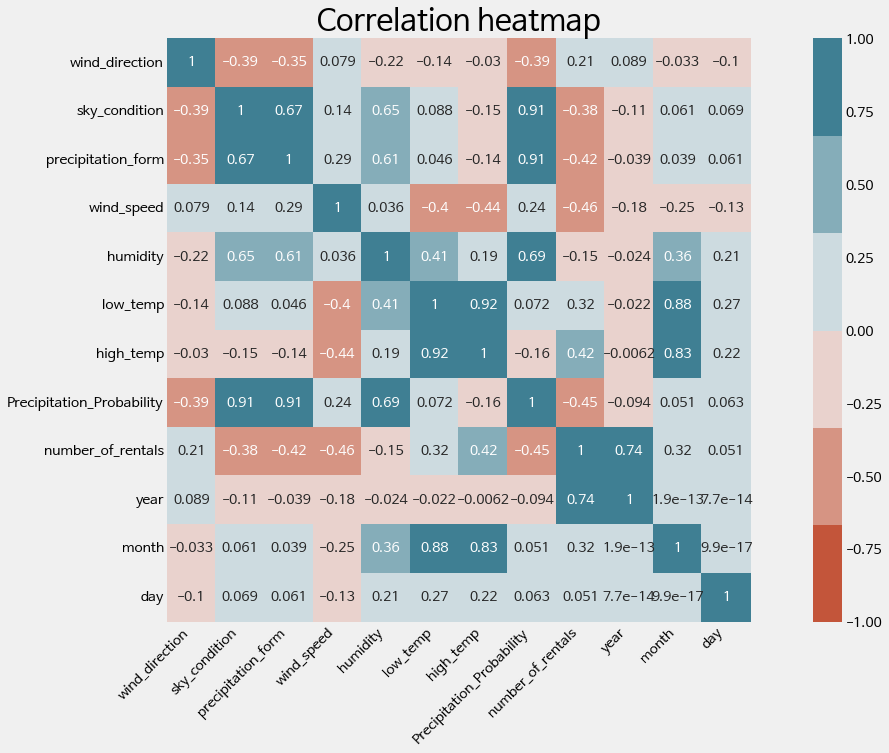

In [ ]:
corr = train_df_number.corr()
plt.figure(figsize=(20, 10))                # figsize는 순차적으로 가로와 세로를 나타냅니다.
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1,                        # vmin=-1, vmax=1는 상관관계 범위를 나타냅니다.
    cmap=sns.diverging_palette(20, 220),    #색상을 변화시킵니다.
    square=True, 
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('Correlation heatmap', fontsize=30)
plt.show()

feature가 많아서 헷갈리니 중요한 몇 개만 추려서 보겠습니다.

우리가 가장 관심있는 것은 자전거 대여량(number_of_rentals)과 어떤 컬럼이 가장 상관관계가 높은가 입니다.

그래프를 보니 years가 가장 높은 양의 상관관계가 있는것으로 나타났네요!

이는 시간이 지날수록 자전거 가입자 수가 늘어났기 때문이라고 해석할 수 있겠습니다.

자 그럼 날짜별로 총 대여량이 얼마나 되는지 확인해보겠습니다.

### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [ ]:
#groupby를 활용해서 연도별 통계값을 표현하는 시리즈를 만듭니다. 

year_rentals = train_df.groupby('year').sum()['number_of_rentals']
month_rentals = train_df.groupby('month').sum()['number_of_rentals']
day_rentals = train_df.groupby('day').sum()['number_of_rentals']

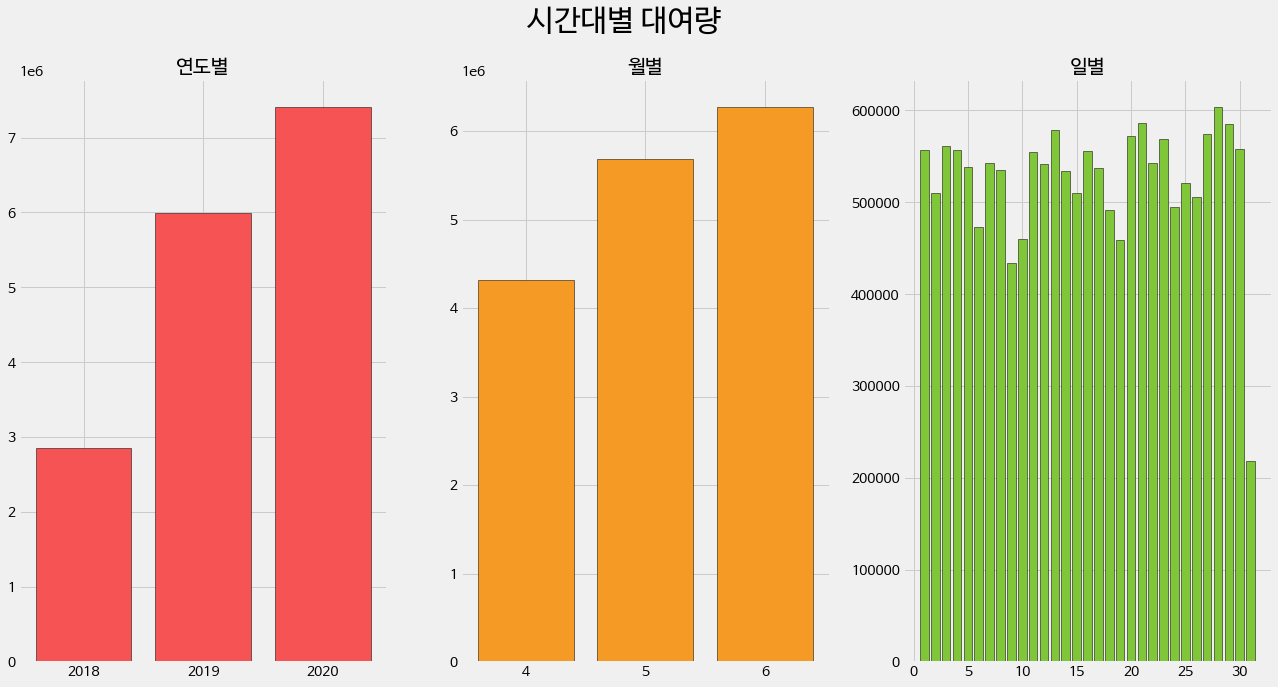

In [ ]:
#위의 시리즈를 활용해 각 그룹별 막대그래프를 만들어보세요

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('시간대별 대여량', fontsize=30)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('연도별', fontsize = 20)

ax[1].bar(x = ['4', '5', '6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('월별', fontsize = 20)

ax[2].bar(x=day_rentals.index.to_list(), height= day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('일별', fontsize = 20)

plt.show()


**위 그래프에서 y축 숫자 스케일을 늘리려면? 7000000 처럼 표시되게...아니면 '천' 단위로라도..**

예상한대로 해를 거듭할수록 사람들이 자전거를 더 많이 대여하는 것으로 보입니다.

4월에서 6월로 갈수록 대여량 수가 늘어나는데요 점점 날이 따뜻해지면서 사용자가 많아지기 때문일까요?

일자와 대여량간의 관계는 미미해보입니다

그렇다면 요일은 어떤 관계가 있을까요??

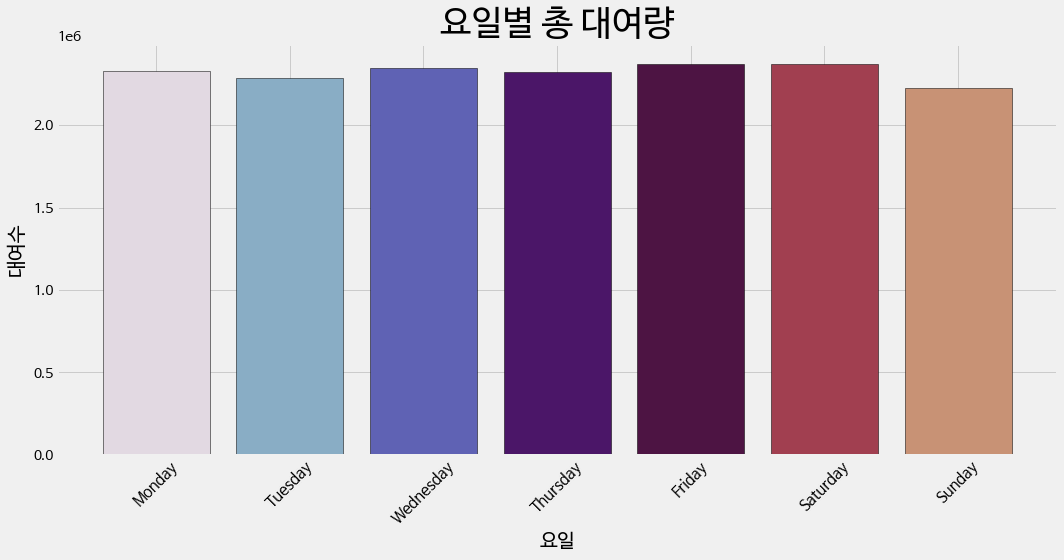

In [ ]:
day_table = train_df.groupby('week_day').sum()
day_table = day_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
color_map = plt.get_cmap('twilight')
color_list = [color_map.colors[i] for i in range(0, 512, 72)]
plt.bar(day_table.index, day_table.number_of_rentals, edgecolor='black', color=color_list)
plt.xticks(rotation=45, fontsize=15)
plt.title('요일별 총 대여량', fontsize=35)
plt.xlabel('요일', fontsize=20)
plt.ylabel('대여수', fontsize=20)
plt.tight_layout()
plt.show()

### plt.scatter()

강수확률, 하늘상태 산점도

굉장히 높은 상관관계를 보인 강수확률과 하늘상태의 산점도를 그려보고

점의 크기를 대여량(크면 클수록 대여량이 높음), 색깔로 년도를 구분해보겠습니다.

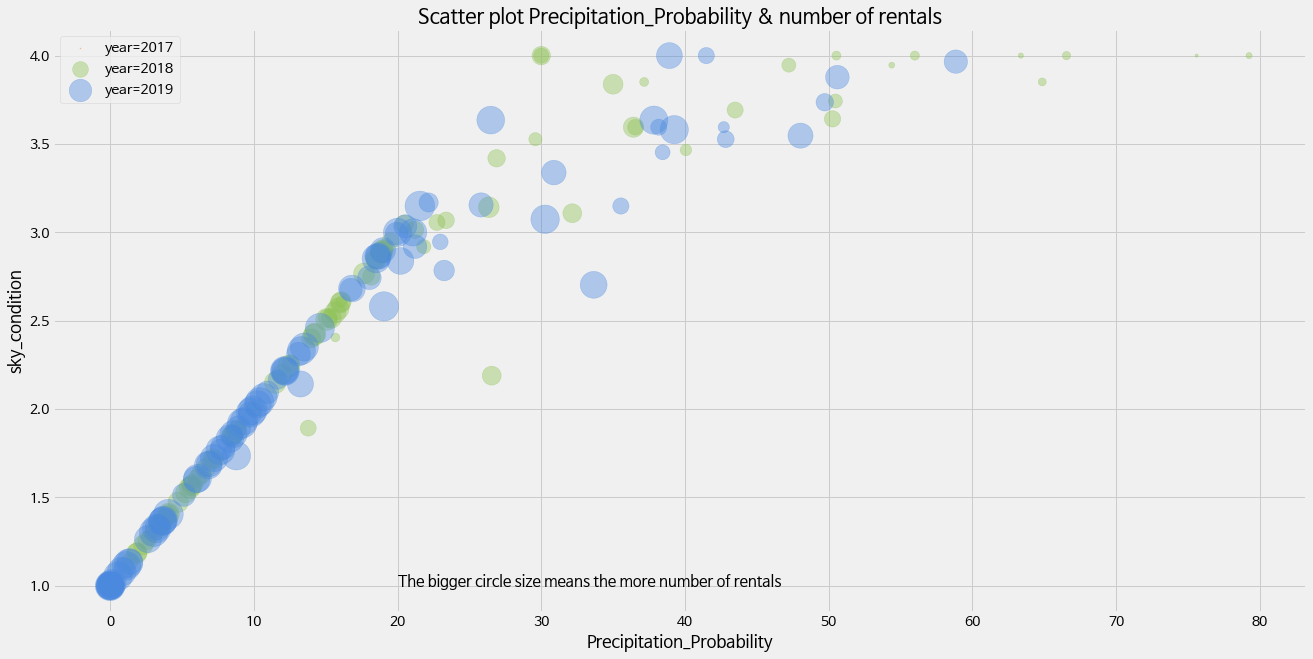

In [ ]:
years = [2017, 2018, 2019]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))
for year, color in zip(years, colors):
    
    precipitation_prb = train_df[train_df['year'] == year].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = train_df[train_df['year'] == year].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = train_df[train_df['year'] == year].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'year={year}')

plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=20)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 15)
plt.legend()
plt.show()

가장 눈에 띄는건 강수확률이 낮으면 낮을수록 하늘 상태의 값도 낮아진다는점(맑음), 강수 확률이 높을수록 점의 크기가 작아진다는점(대여량이 줄어듦) 등이 있습니다.

이번엔 색깔을 월별로 나누어 보겠습니다.

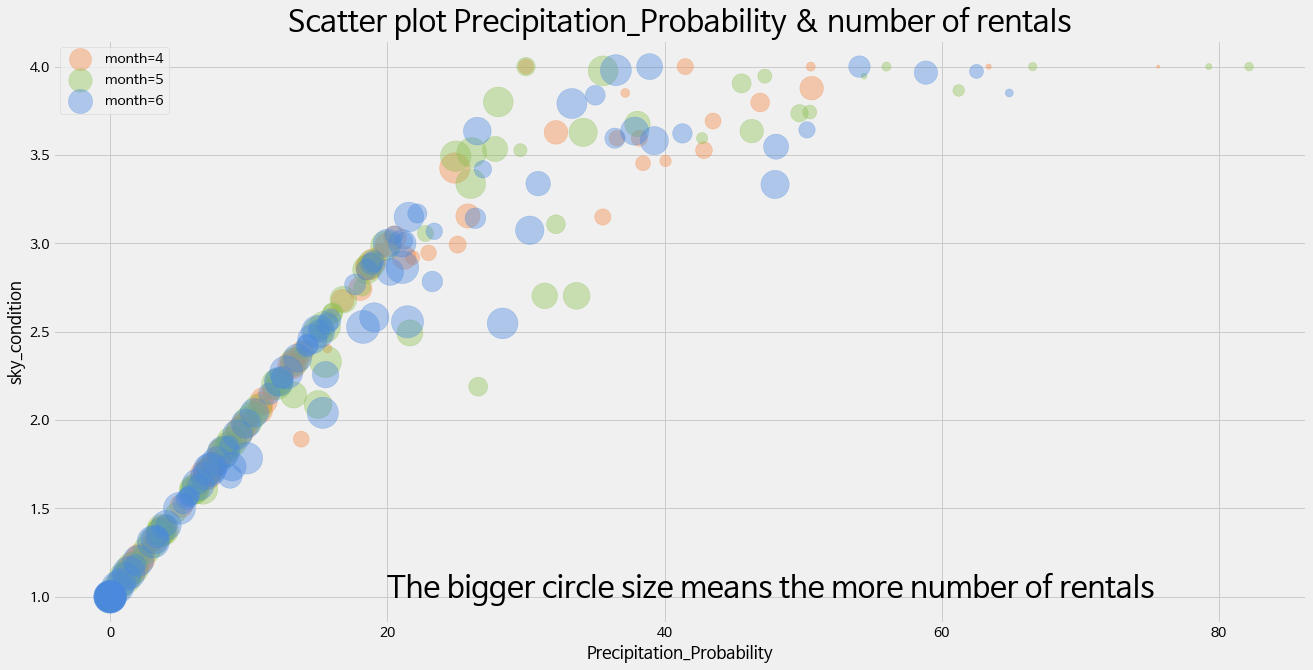

In [ ]:
monthes = [4, 5, 6]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))
for month, color in zip(monthes, colors):
    
    precipitation_prb = train_df[train_df['month'] == month].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = train_df[train_df['month'] == month].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = train_df[train_df['month'] == month].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'month={month}')


plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 30)
plt.legend()
plt.show()

그래프를 살펴보니 사람들은 6월에 자전거를 가장 많이 빌리는 것처럼 보입니다.

이 밖에 또 어떤 인사이트를 찾을 수 있을까요?

여러분은 이번 데이터에서 어떠한 특이점을 볼 수 있었나요?